# Data Pre-processing 
Data pre-processing techniques generally refer to the addition, deletion, or transformation of training set data. Although this text is primarily concerned with modeling techniques, data preparation can make or break a model’s predictive ability.

The need for data pre-processing is determined by the type of model being used. Some procedures, such as tree-based models, are notably insensitive to the characteristics of the predictor data. Others, like linear regression, are not.
The “correct” feature engineering depends on several factors. First, some encodings may be optimal for some models and poor for others. For example, tree-based models will partition the data into two or more bins. Theoretically, if the month were important, the tree would split the numeric day of the year accordingly. Also, in some models, multiple encodings of the same data may cause problems. As will be illustrated several times in later chapters, some models contain built-in feature selection, meaning that the model will only include predictors that help maximize accuracy. In these cases, the model can pick and choose which representation of the data is best. 

The relationship between the predictor and the outcome is a second factor. For example, if there were a seasonal component to these data, and it appears that there is, then the numeric day of the year would be best. Also, if some months showed higher success rates than others, then the encoding based on the month is preferable. 
As with many questions of statistics, the answer to “which feature engineering methods are the best?” is that it depends. Specifically, it depends on the model being used and the true relationship with the outcome.


# Messy Datasets 
Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model. 
Although critically important, data cleaning is not exciting, nor does it involve fancy techniques. Just a good knowledge of the dataset. 

# Columns That Contain a Single Value 
Columns that have a single observation or value are probably useless for modeling. These columns or predictors are referred to zero-variance predictors as if we measured the variance (average value from the mean), it would be zero. 
Variables or columns that have a single value should probably be removed from your dataset 

# Consider Columns That Have Very Few Values 
we saw that some columns in the example dataset had very few unique values. For example, there were columns that only had 2, 4, and 9 unique values. This might make sense for ordinal or categorical variables. In this case, however, the dataset only contains numerical variables. As such, only having 2, 4, or 9 unique numerical values in a column might be surprising. We can refer to these columns or predictors as near-zero variance predictors, as their variance is not zero, but a very small number close to zero. 
Depending on the choice of data preparation and modeling algorithms, variables with very few numerical values can also cause errors or unexpected results. 
To help highlight columns of this type, you can calculate the number of unique values for each variable as a percentage of the total number of rows in the dataset. 

# Rows That Contain Duplicate Data 
Rows that have identical data are could be useless to the modeling process, if not dangerously misleading during model evaluation. Here, a duplicate row is a row where each value in each column for that row appears in identically the same order (same column values) in another row. 
Machine learning algorithms will perform better by identifying and removing rows with duplicate data. From an algorithm evaluation perspective, duplicate rows will result in misleading performance. For example, if you are using a train/test split or k-fold cross-validation, then it is possible for a duplicate row or rows to appear in both train and test datasets and any evaluation of the model on these rows will be (or should be) correct. This will result in an optimistically biased estimate of performance on unseen data

# Between-Predictor Correlations 
Collinearity is the technical term for the situation where a pair of pre- dictor variables have a substantial correlation with each other. It is also possible to have relationships between multiple predictors at once (called multicollinearity). 

When the data set consists of too many predictors to examine visually, techniques such as PCA can be used to characterize the magnitude of the problem. 

In general, there are good reasons to avoid data with highly correlated predictors. First, redundant predictors frequently add more complexity to the model than information they provide to the model. In situations where ob- taining the predictor data is costly (either in time or money), fewer variables is obviously better. While this argument is mostly philosophical, there are mathematical disadvantages to having correlated predictor data. Using highly correlated predictors in techniques like linear regression can result in highly unstable models, numerical errors, and degraded predictive performance. 

A less theoretical, more heuristic approach to dealing with this issue is to remove the minimum number of predictors to ensure that all pairwise correlations are below a certain threshold. While this method only identify collinearities in two dimensions, it can have a significantly positive effect on the performance of some models. 

The algorithm is as follows:

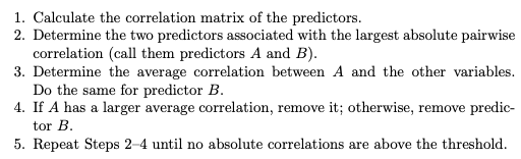

The idea is to first remove the predictors that have the most correlated relationships. Suppose we wanted to use a model that is particularly sensitive to between- predictor correlations, we might apply a threshold of 0.75. This means that we want to eliminate the minimum number of predictors to achieve all pairwise correlations less than 0.75. For the segmentation data, this algorithm would suggest removing 43 predictors.

# Outlier Identification and Removal 
When modeling, it is important to clean the data sample to ensure that the observations best represent the problem. Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values. 

Methods:
- Standard Deviation Method. 
- Interquartile Range Method. 
- Automatic Outlier Detection. 


# Transformations to Resolve Outliers 
We will generally define outliers as samples that are exceptionally far from the mainstream of the data. 

However, we can often identify an un- usual value by looking at a figure. When one or more samples are suspected to be outliers, the first step is to make sure that the values are scientifically valid (e.g., positive blood pressure) and that no data recording errors have occurred. 

If a model is considered to be sensitive to outliers, one data transformation that can minimize the problem is the spatial sign (Serneels et al. 2006). This procedure projects the predictor values onto a multidimensional sphere. This has the effect of making all the samples the same distance from the center of the sphere. Mathematically, each sample is divided by its squared norm: 

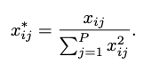

Since the denominator is intended to measure the squared distance to the center of the predictor’s distribution, it is important to center and scale the predictor data prior to using this transformation. Note that, unlike centering or scaling, this manipulation of the predictors transforms them as a group. Removing predictor variables after applying the spatial sign transformation may be problematic. 

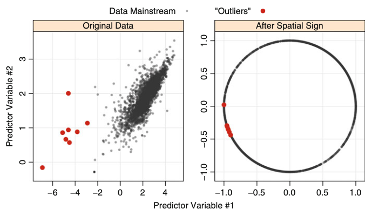

# Handling Missing Data 

Missing data can occur any number of ways, some of which include the following:

- Merging of source data sets: A simple example commonly occurs when two data sets are merged by a sample identifier (ID). If an ID is present in only the first data set, then the merged data will contain missing values for that ID for all of the predictors in the second data set. 


- Random events: Any measurement process is vulnerable to random events that prevent data collection. Consider the setting where data are collected in a medical diagnostic lab. Accidental misplacement or damage of a biological sample (like blood or serum) would prevent measurements from being made on the sample, thus inducing missing values. Devices that collect actigraphy data can also be affected by random events. For example, if a battery dies or the collection device is damaged then measurements cannot be collected and will be missing in the final data. 


- Failures of measurement: Measurements based on images require that an image be in focus. Images that are not in focus or are damaged can induce missing values. Another example of a failure of measurement occurs when a patient in a clinical study misses a scheduled physician visit. Measurements that would have been taken for the patient at that visit would then be missing in the final data.

Feature engineering techniques, as well as many others discussed throughout this work, require that the data have no missing values. Moreover, missing values in the original predictors, regardless of any feature engineering, are intolerable in many kinds of predictive models. Therefore, to utilize predictors or feature engineering techniques, we must first address the missingness in the data. Also, the missingness itself may be an important predictor of the response. 

*There are a few predictive models that can internally handle incomplete data. Certain implementations of tree-based models have clever procedures to accommodate incomplete data. Another method that can tolerate missing data is Naive Bayes.

# Visualizing Missing Information 
When the training set has a moderate number of samples and predictors, a simple method to visualize the missing information is with a heatmap. 

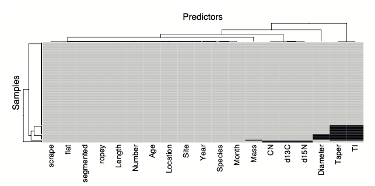

This visualization illustrates that most predictors and samples have complete or nearly complete information. The three morphological predictors (diameter, taper, and taper index) are more frequently missing. Also, two samples are missing all three of the laboratory measurements (d13N, d15N, and CN). 
When the data has a large number of samples or predictors, using heatmaps or co-occurrence plots is much less effective for understanding missingness patterns and characteristics. In this setting, the missing information must first be condensed prior to visualization. 
It turns out that PCA can also be used to visualize and understand the samples and predictors that have problematic levels of missing information. To use PCA in this setting, the predictor matrix is converted to a binary matrix where a zero represents a non-missing value and a one represents a missing value. 
To do this, the binary matrix representing missing values is first transposed so that predictors are now in the rows and the samples are in the columns. PCA is then applied to this matrix and the resulting dimensions now capture variation cause by the presence of missing values across the predictors. 

# Summarizing Missing Information 
Simple numerical summaries are effective at identifying problematic predictors and samples when the data become too large to visually inspect. On a first pass, the total number or percent of missing values for both predictors and samples can be easily computed 

These summaries can then be used for investigating the underlying reasons why values are missing or as a screening mechanism for removing predictors or samples with egregious amounts of missing values. 

# Encoding Missingness 
When a predictor is discrete in nature, missingness can be directly encoded into the predictor as if it were a naturally occurring category. This makes sense for structurally missing values.

# Remove Rows With Missing Values 
The simplest strategy for handling missing data is to remove records that contain a missing value. 
Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values. 

# Imputation Methods 
Another approach to handling missing values is to impute or estimate them. 
In essence, imputation uses information and relationships among the non- missing predictors to provide an estimate to fill in the missing value. 

It is a popular approach because the statistic is easy to calculate using the training dataset and because it often results in good performance.

Common statistics calculated include: 
- The column mean value.
- The column median value. 
- The column mode value.
- A constant value. 

# Statistical Imputation With SimpleImputer 
The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation. 

# k-Nearest Neighbor Imputation 
An effective approach to data imputing is to use a model to predict the missing values. A model is created for each feature that has missing values, taking as input values of perhaps all other input features. 
If input variables are numeric, then regression models can be used for prediction, and this case is quite common. A range of different models can be used, although a simple k-nearest neighbor (KNN) model has proven to be effective in experiments. The use of a KNN model to predict or fill missing values is referred to as Nearest Neighbor Imputation or KNN imputation. 
Configuration of KNN imputation often involves selecting the distance measure (e.g. Eu- clidean) and the number of contributing neighbors for each prediction, the k hyperparameter of the KNN algorithm. Now that we are familiar with nearest neighbor methods for missing value imputation, let’s take a look at a dataset with missing values. 

How do we know that using a default number of neighbors of five is good or best for this dataset? The answer is that we don’t. 

The key hyperparameter for the KNN algorithm is k; that controls the number of nearest neighbors that are used to contribute to a prediction. It is good practice to test a suite of different values for k. 

# Iterative Imputation 
Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features. 

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated. This approach may be generally referred to as fully conditional specification (FCS) or multivariate imputation by chained equations (MICE). 

Different regression algorithms can be used to estimate the missing values for each feature, although linear methods are often used for simplicity. The number of iterations of the procedure is often kept small, such as 10. Finally, the order that features are processed sequentially can be considered, such as from the feature with the least missing values to the feature with the most missing values. 

# Encode Categorical Data

Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. 

The two most popular techniques are an Ordinal encoding and a One Hot encoding.

- Nominal Variable. Variable comprises a finite set of discrete values with no rank-order relationship between values. 
- Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values. 

Tree-based and naive Bayes models are exceptions; most models require that the predictors take numeric form. 

If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application. 

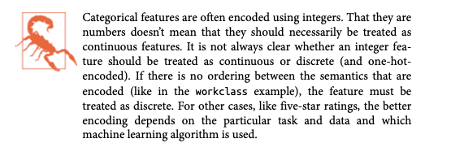

# Ordinal Encoding 
In ordinal encoding, each unique category value is assigned an integer value. For example, red is 1, green is 2, and blue is 3. This is called an ordinal encoding or an integer encoding and is easily reversible. 

An integer ordinal encoding is a natural encoding for ordinal variables. For categorical variables, it imposes an ordinal relationship where no such relationship may exist. This can cause problems and a one hot encoding may be used instead. 

By default, it will assign integers to labels in the order that is observed in the data. If a specific order is desired, it can be specified via the categories argument as a list with the rank order of all expected labels. 

This OrdinalEncoder class is intended for input variables that are organized into rows and columns, e.g. a matrix. If a categorical target variable needs to be encoded for a classification predictive modeling problem, then the LabelEncoder class can be used. It does the same thing as the OrdinalEncoder, although it expects a one-dimensional input for the single target variable. 

# One Hot Encoding 
For categorical variables where no ordinal relationship exists, the integer encoding may not be enough or even misleading to the model. 

Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories). 

In this case, a one hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable. 

# Dummy Variable Encoding 
The one hot encoding creates one binary variable for each category. The problem is that this representation includes redundancy. For example, if we know that [1, 0, 0] represents blue and [0, 1, 0] represents green we don’t need another binary variable to represent red, instead we could use 0 values alone, e.g. [0, 0]. This is called a dummy variable encoding, and always represents C categories with C − 1 binary variables. 

In addition to being slightly less redundant, a dummy variable representation is required for some models. For example, in the case of a linear regression model (and other regression models that have a bias term), a one hot encoding will cause the matrix of input data to become singular, meaning it cannot be inverted and the linear regression coefficients cannot be calculated using linear algebra. For these types of models a dummy variable encoding must be used instead. 

We can use the OneHotEncoder class to implement a dummy encoding as well as a one hot encoding. The drop argument can be set to indicate which category will become the one that is assigned all zero values, called the baseline. We can set this to ‘first’ so that the first category is used. When the labels are sorted alphabetically, the blue label will be the first and will become the baseline. 

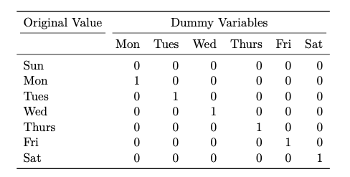

When there are C possible values of the predictor and only C − 1 dummy variables are used, the matrix inverse can be computed and the contrast method is said to be a full rank parameterization.

# Approaches for Novel Categories 

What happens to the model prediction when a new individual lives in a city that is not represented in the original data? If the models are solely based on dummy variables, then the models will not have seen this information and will not be able to generate a prediction. 

If there is a possibility of encountering a new category in the future, one strategy would be to use the previously mentioned “other” category to capture new values.

# The Scale of Your Data Matters 
Machine learning models learn a mapping from input variables to an output variable. As such, the scale and distribution of the data drawn from the domain may be different for each variable. Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales. Differences in the scales across input variables may increase the difficulty of the problem being modeled. 

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. This includes algorithms that use a weighted sum of the input, like linear regression, and algorithms that use distance measures, like k-nearest neighbors. The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization. 

- Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. 


- Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one. 

# Data Normalization 
Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1. Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data. 

You can normalize your dataset using the scikit-learn object MinMaxScaler. Good practice usage with the MinMaxScaler and other scaling techniques is as follows: 

- Fit the scaler using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the fit() function. 
- Apply the scale to training data. This means you can use the normalized data to train your model. This is done by calling the transform() function. 
- Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make predictions. 

The default scale for the MinMaxScaler is to rescale variables into the range [0,1], although a preferred scale can be specified via the feature range argument as a tuple containing the min and the max for all variables. 

# Data Standardization 
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean value or centering the data.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results. 

Standardization can become skewed or biased if the input variable contains outlier values. 
To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as robust scaling. In this tutorial, you will discover how to use robust scaler transforms to standardize numerical input variables for classification and regression.

# Robust Scaling Data 
If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values. 

Sometimes an input variable may have outlier values. These are values on the edge of the distribution that may have a low probability of occurrence, yet are overrepresented for some reason. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers. One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable. This is called robust standardization or robust data scaling. 

The robust scaler transform is available in the scikit-learn Python machine learning library via the RobustScaler class. The with centering argument controls whether the value is centered to zero (median is subtracted) and defaults to True. The with scaling argument controls whether the value is scaled to the IQR (standard deviation set to one) or not and defaults to True.

# Power Transforms 
A power transform will make the probability distribution of a variable more Gaussian. This is often described as removing a skew in the distribution, although more generally is described as stabilizing the variance of the distribution. 

We can apply a power transform directly by calculating the log or square root of the variable, although this may or may not be the best power transform for a given variable. 
Instead, we can use a generalized version of the transform that finds a parameter (lambda or λ) that best transforms a variable to a Gaussian probability distribution. There are two popular approaches for such automatic power transforms; they are: 
- Box-Cox Transform 
- Yeo-Johnson Transform 

# Box-Cox Transform 

It is a power transform that assumes the values of the input variable to which it is applied are strictly positive. That means 0 and negative values are not supported. 

# Yeo-Johnson Transform 
The Yeo-Johnson transform is also named for the authors. Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive. It supports zero values and negative values. This means we can apply it to our dataset without scaling it first. 

We can apply the transform by defining a PowerTransformer object and setting the method argument to ‘yeo-johnson’ (the default). 

# Binning

The best way to represent data depends not only on the semantics of the data, but also on the kind of model you are using. Linear models and tree-based models (such as decision trees, gradient boosted trees, and random forests), two large and very commonly used families, have very different properties when it comes to how they work with different feature representations. 

As you know, linear models can only model linear relationships, which are lines in the case of a single feature. The decision tree can build a much more complex model of the data. However, this is strongly dependent on the representation of the data. 

One way to make linear models more powerful on continuous data is to use binning (also known as discretization) of the feature to split it up into multiple features, as described here. 

Binning features generally has no beneficial effect for tree-based models, as these models can learn to split up the data any‐ where. In a sense, that means decision trees can learn whatever binning is most useful for predicting on this data. Additionally, decision trees look at multiple features at once, while binning is usually done on a per-feature basis. However, the linear model benefited greatly in expressiveness from the transformation of the data. 

If there are good reasons to use a linear model for a particular dataset—say, because it is very large and high-dimensional, but some features have nonlinear relations with the output—binning can be a great way to increase modeling power. 

Different methods for grouping the values into k discrete bins can be used; common techniques include: 

- Uniform: Each bin has the same width in the span of possible values for the variable. 
- Quantile: Each bin has the same number of values, split based on percentiles.
- Clustered: Clusters are identified and examples are assigned to each group. 

The discretization transform is available in the scikit-learn Python machine learning library via the KBinsDiscretizer class. 

# --------------------------------------------------------------------------------

# --------------------------------------------------------------------------------

# An Introduction to Feature Selection 

From a practical point of view, a model with less predictors may be more interpretable and less costly especially if there is a cost to measuring the predictors. Statistically, it is often more attractive to estimate fewer param- eters. 

Also, as we will soon see, some models may be negatively affected by non-informative predictors. Some models are naturally resistant to non-informative predictors. Tree- and rule-based models, MARS and the lasso.

An important distinction to be made in feature selection is that of supervised and unsupervised methods: 

- When the outcome is ignored during the elimination of predictors, the technique is unsupervised and included removing predictors that have high correlations with other predictors or that have very sparse and unbalanced distributions (i.e., near-zero variance predictors). In each case, the outcome is independent of the filtering calculations.


- For supervised methods, predictors are specifically selected for the purpose of increasing accuracy or to find a subset of predictors to reduce the complexity of the model. Here, the outcome is typically used to quantify the importance of the predictors.

# Consequences of Using Non-informative Predictors 

Feature selection is primarily focused on removing non-informative or redundant predictors from the model. The importance of feature selection depends on which model is being used. 

Many models, especially those based on regression slopes and intercepts, will estimate parameters for every term in the model. Because of this, the presence of non-informative variables can add uncertainty to the predictions and reduce the overall effectiveness of the model. 

Regression trees and MARS models are not affected due to the built-in feature selection. 

The parametrically structured models, such as linear regression, partial least squares, and neural networks, are most affected. Support vector machines Too.

Our basic goal is to reduce their number in a way that maximizes performance.

# Model-Based Feature Selection 

Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. The supervised model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling. 

The feature selection model needs to provide some measure of importance for each feature, so that they can be ranked by this measure. 
Decision trees and decision tree–based models provide a feature_importances_ attribute, which directly encodes the importance of each feature. Linear models have coefficients, which can also be used to capture feature importances by considering the absolute values. 

Linear models with L1 penalty learn sparse coefficients, which only use a small subset of features. This can be viewed as a form of feature selection for the model itself, but can also be used as a preprocessing step to select features for another model. 

In contrast to univariate selection, model-based selection considers all features at once, and so can capture interactions (if the model can capture them). To use model-based feature selection, we need to use the SelectFromModel transformer 

# Approaches for Reducing the Number of Predictors 

Apart from models with built-in feature selection, most approaches for reducing the number of predictors can be placed into two main categories:

- Wrapper methods evaluate multiple models using procedures that add and/or remove predictors to find the optimal combination that maximizes model performance. In essence, wrapper methods are search algorithms that treat the predictors as the inputs and utilize model performance as the output to be optimized. 

- Filter methods evaluate the relevance of the predictors outside of the predictive models and subsequently model only the predictors that pass some criterion. For example, for classification problems, each predictor could be individually evaluated to check if there is a plausible relationship between it and the observed classes. Only predictors with important relationships would then be included in a classification model. 

Both approaches have advantages and drawbacks. Filter methods are usually more computationally efficient than wrapper methods, but the selection criterion is not directly related to the effectiveness of the model. Also, most filter methods evaluate each predictor separately, and, consequently, redundant (i.e., highly-correlated) predictors may be selected and important interactions between variables will not be able to be quantified. 

The downside of the wrapper method is that many models are evaluated (which may also require parameter tuning) and thus an increase in computation time. There is also an increased risk of over-fitting with wrappers.

# --------------------------------------------------------------------------------

# Wrapper Methods 

As previously stated, wrapper methods conduct a search of the predictors to determine which, when entered into the model, produce the best results. 

A simple example is classical forward selection for linear regression.
Here, the predictors are evaluated (one at a time) in the current linear regression model. A statistical hypothesis test can be conducted to see if each of the newly added predictors is statistically significant (at some predefined threshold). If at least one predictor has a p-value below the threshold, the predictor associated with the smallest value is added to the model and the process starts again. The algorithm stops when none of the p-values for the remaining predictors are statistically significant. In this scheme, linear regression is the base learner and forward selection is the search procedure. 

The objective function is the quantity being optimized which, in this case, is statistical significance as represented by the p-value. 

# Forward, Backward, and Stepwise Selection 

Stepwise selection is a popular modification where, after each candidate variable is added to the model, each term is reevaluated for removal from the model. In some cases, the p-value threshold for adding and removing predictors can be quite different. Although this makes the search procedure less greedy, it exacerbates the problem of re- peated hypothesis testing. 

In backward selection, the initial model contains all P predictors which are then iteratively removed to determine which are not significantly contributing to the model. Guyon et al. (2002) described a backward selection algorithm (called recursive feature elimination) that avoids refitting many models at each step of the search. When the full model is created, a measure of variable importance is computed that ranks the predictors from most important to least.

While it is easy to treat the RFE algorithm as a black box, there are some considerations that should be made. For example, when the outcome has more than two classes, some classes may have a large degree of separation from the rest of the training set. As such, it may be easier to achieve smaller error rates for these classes than the others. When the predictors are ranked for selection, the predictors associated with the “easy” classes may saturate the positions for the highest ranks. As a result, the difficult classes are neglected and maintain high error rates. In this case, class-specific importance scores can aid in selecting a more balanced set of predictors in an effort to balance the error rates across all the classes. 

# Recursive Feature Elimination 

Recursive feature elimination (RFE, Guyon et al. (2002)) is basically a backward selection of the predictors. This technique begins by building a model on the entire set of predictors and computing an importance score for each predictor. The least important predictor(s) are then removed, the model is re-built, and importance scores are computed again. 

In practice, the analyst specifies the number of predictor subsets to evaluate as well as each subset’s size. Therefore, the subset size is a tuning parameter for RFE. The subset size that optimizes the performance criteria is used to select the predictors based on the importance rankings. The optimal subset is then used to train the final model. 

The selection process is resampled in the same way as fundamental tuning parameters from a model, such as the number of nearest neighbors or the amount of weight decay in a neural network. The resampling process includes the feature selection routine and the external resamples are used to estimate the appropriate subset size. 

Not all models can be paired with the RFE method, and some models benefit more from RFE than others. Because RFE requires that the initial model uses the full predictor set, some models cannot be used when the number of predictors exceeds the number of samples. These models include multiple linear regression, logistic regression, and linear discriminant analysis. If we desire to use one of these techniques with RFE, then the predictors must first be winnowed down. 

Backwards selection is frequently used with random forest models for two reasons:

1. Random forest tends not to exclude variables from the prediction equation. The reason is related to the nature of model ensembles. Increased performance in ensembles is related to the diversity in the constituent models; averaging models that are effectively the same does not drive down the variation in the model predictions. For this reason, random forest coerces the trees to contain sub-optimal splits of the predictors using a random sample of predictors.

    The act of restricting the number of predictors that could possibly be used in a split increases the likelihood that an irrelevant predictor will be chosen. While such a predictor may not have much direct impact on the performance of the model, the prediction equation is functionally dependent on that predictor. As our simulations showed, tree ensembles may use every possible predictor at least once in the ensemble. For this reason, random forest can use some post hoc pruning of variables that are not essential for the model to perform well. When many irrelevant predictors are included in the data and the RFE process is paired with random forest, a wide range of subset sizes can exhibit very similar predictive performances. 


2. Random forest is used with RFE is because this model has a well-known internal method for measuring feature importance and can be used with the first model fit within RFE, where the entire predictor set is used to compute the feature rankings. 

    RFE can be an effective and relatively efficient technique for reducing the model complexity by removing irrelevant predictors. Although it is a greedy approach, it is probably the most widely used method for feature selection. 
    
There are two important configuration options when using RFE: 

- the choice in the number of features to select
- the choice of the algorithm used to help choose features

Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well. 

# --------------------------------------------------------------------------------

# Filter Methods 

As previously stated, filter methods evaluate the predictors prior to training the model, and, based on this evaluation, a subset of predictors are entered into the model. 

Since the scoring of predictors is disconnected from the model, many of the variable importance metrics would be appropriate for filtering the variables. Most of these techniques are univariate, meaning that they evaluate each predictor in isolation. 

In this case, the existence of correlated predictors makes it possible to select important, but redundant, predictors. The obvious consequences of this issue are that too many predictors are chosen and, as a result, collinearity problems arise. 

While filter methods tend to be simple and fast, there is a subjective nature to the procedure. Most scoring methods have no obvious cut point to declare which predictors are important enough to go into the model. Even in the case of statistical hypothesis tests, the user must still select the confidence level to apply to the results. In practice, finding an appropriate value for the confidence value α may require several evaluations until acceptable performance is achieved. 

# Univariate Statistics 

In univariate statistics, we compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the highest confidence are selected. 

In the case of classification, this is also known as analysis of variance (ANOVA).

A key property of these tests is that they are univariate, meaning that they only consider each feature individually. Consequently, a feature will be discarded if it is only informative when combined with another feature. 

Univariate tests are often very fast to compute, and don’t require building a model. On the other hand, they are completely independent of the model that you might want to apply after the feature selection. 

To use univariate feature selection in scikit-learn, you need to choose a test, usually either f_classif (the default) for classification or f_regression for regression, and a method to discard features based on the p-values determined in the test. 

All methods for discarding parameters use a threshold to discard all features with too high a p-value (which means they are unlikely to be related to the target). The methods differ in how they compute this threshold, with the simplest ones being SelectKBest, which selects a fixed number k of features, and SelectPercentile, which selects a fixed percentage of features. 

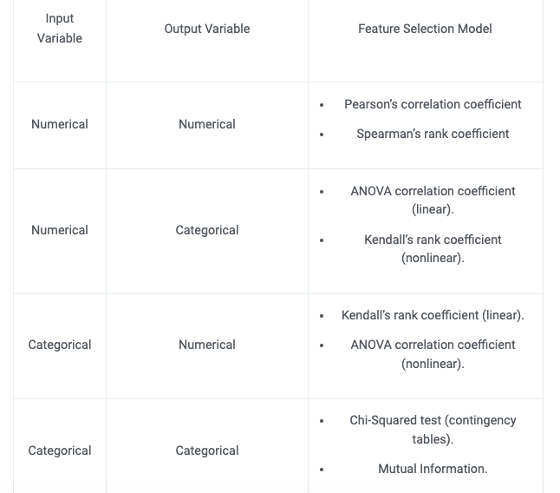

# --------------------------------------------------------------------------------

# Utilizing Expert Knowledge 

Feature engineering is often an important place to use expert knowledge for a particular application. While the purpose of machine learning in many cases is to avoid having to create a set of expert-designed rules, that doesn’t mean that prior knowledge of the application or domain should be discarded. 

Often, domain experts can help in identifying useful features that are much more informative than the initial representation of the data. 

# --------------------------------------------------------------------------------

# --------------------------------------------------------------------------------

# Cross-Validation 

Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In cross- validation, the data is instead split repeatedly and multiple models are trained. 

The most commonly used version of cross-validation is k-fold cross-validation, where k is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds. Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets. For each of these five splits of the data into training and test sets, we compute the accuracy. In the end, we have collected five accuracy values.

# Benefits of Cross-Validation 

When using cross-validation, each example will be in the training set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high. 

Having multiple splits of the data also provides some information about how sensi‐ tive our model is to the selection of the training dataset. For the iris dataset, we saw accuracies between 90% and 100%. This is quite a range, and it provides us with an idea about how the model might perform in the worst case and best case scenarios when applied to new data. 

Another benefit of cross-validation as compared to using a single split of the data is that we use our data more effectively. When using train_test_split, we usually use 75% of the data for training and 25% of the data for evaluation. When using five-fold cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the model. When using 10-fold cross-validation, we can use nine-tenths of the data (90%) to fit the model. More data will usually result in more accurate models. 

The main disadvantage of cross-validation is increased computational cost. As we are now training k models instead of a single model, cross-validation will be roughly k times slower than doing a single split of the data. 

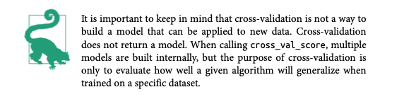

# Stratified k-Fold Cross-Validation and Other Strategies 

Splitting the dataset into k folds by starting with the first one-k-th part of the data, as described in the previous section, might not always be a good idea. As the classes in training and test sets would be different for all three splits, the three-fold cross-validation accuracy would be zero on this dataset. That is not very helpful, as we can do much better than 0% accuracy. 

As the simple k-fold strategy fails here, scikit-learn does not use it for classification, but rather uses stratified k-fold cross-validation. In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

For example, if 90% of your samples belong to class A and 10% of your samples belong to class B, then stratified cross-validation ensures that in each fold, 90% of samples belong to class A and 10% of samples belong to class B. 
It is usually a good idea to use stratified k-fold cross-validation instead of k-fold cross-validation to evaluate a classifier, because it results in more reliable estimates of generalization performance.

For regression, scikit-learn uses the standard k-fold cross-validation by default. It would be possible to also try to make each fold representative of the different values the regression target has, but this is not a commonly used strategy and would be surprising to most users. 

For most use cases, the defaults of k-fold cross- validation for regression and stratified k-fold for classification work well, but there are some cases where you might want to use a different strategy. 

# More control over cross-validation 

Another way to resolve this problem is to shuffle the data instead of stratifying the folds, to remove the ordering of the samples by label. We can do that by setting the shuffle parameter of KFold to True. 

If we shuffle the data, we also need to fix the random_state to get a reproducible shuffling. Otherwise, each run of cross_val_score would yield a different result, as each time a different split would be used (this might not be a problem, but can be surprising).

Shuffling the data before splitting it yields a much better result.

# Leave-one-out cross-validation 

Another frequently used cross-validation method is leave-one-out. You can think of leave-one-out cross-validation as k-fold cross-validation where each fold is a single sample. For each split, you pick a single data point to be the test set. 

This can be very time consuming, particularly for large datasets, but sometimes provides better estimates on small datasets.

# Shuffle-split cross-validation 

Another, very flexible strategy for cross-validation is shuffle-split cross-validation. In shuffle-split cross-validation, each split samples train_size many points for the training set and test_size many (disjoint) point for the test set. This splitting is repeated n_iter times. Figure 5-3 illustrates running four iterations of splitting a dataset consisting of 10 points, with a training set of 5 points and test sets of 2 points each (you can use integers for train_size and test_size to use absolute sizes for these sets, or floating-point numbers to use fractions of the whole dataset).

There is also a stratified variant of ShuffleSplit, aptly named StratifiedShuffleS plit, which can provide more reliable results for classification tasks. 

# Cross-validation with groups 

Another very common setting for cross-validation is when there are groups in the data that are highly related. Say you want to build a system to recognize emotions from pictures of faces, and you collect a dataset of pictures of 100 people where each person is captured multiple times, showing various emotions. The goal is to build a classifier that can correctly identify emotions of people not in the dataset. You could use the default stratified cross-validation to measure the performance of a classifier here. However, it is likely that pictures of the same person will be in both the training and the test set. It will be much easier for a classifier to detect emotions in a face that is part of the training set, compared to a completely new face. To accurately evaluate the generalization to new faces, we must therefore ensure that the training and test sets contain images of different people. 

To achieve this, we can use GroupKFold, which takes an array of groups as argument that we can use to indicate which person is in the image. The groups array here indi‐ cates groups in the data that should not be split when creating the training and test sets, and should not be confused with the class label. 

# Grid Search 
Now that we know how to evaluate how well a model generalizes, we can take the next step and improve the model’s generalization performance by tuning its parameters. 

Finding the values of the important parameters of a model (the ones that provide the best generalization performance) is a tricky task, but necessary for almost all models and datasets. Because it is such a common task, there are standard methods in scikit-learn to help you with it. The most commonly used method is grid search, which basically means trying all possible combinations of the parameters of interest. 

# The Danger of Overfitting the Parameters and the Validation Set 

Given this result, we might be tempted to report that we found a model that performs with 97% accuracy on our dataset. However, this claim could be overly optimistic (or just wrong), for the following reason: we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily carry over to new data. 

Because we used the test data to adjust the parameters, we can no longer use it to assess how good the model is. This is the same reason we needed to split the data into training and test sets in the first place; we need an independent dataset to evaluate, one that was not used to create the model. 

One way to resolve this problem is to split the data again, so we have three sets: the training set to build the model, the validation (or development) set to select the parameters of the model, and the test set to evaluate the performance of the selected parameters.

After selecting the best parameters using the validation set, we can rebuild a model using the parameter settings we found, but now training on both the training data and the validation data. This way, we can use as much data as possible to build our model.

The distinction between the training set, validation set, and test set is fundamentally important to applying machine learning methods in practice. Any choices made based on the test set accuracy “leak” information from the test set into the model. Therefore, it is important to keep a separate test set, which is only used for the final evaluation. It is good practice to do all exploratory analysis and model selection using the combination of a training and a validation set, and reserve the test set for a final evaluation—this is even true for exploratory visualization. Strictly speaking, evaluat‐ ing more than one model on the test set and choosing the better of the two will result in an overly optimistic estimate of how accurate the model is.

# Grid Search with Cross-Validation 

For a better estimate of the generalization performance, instead of using a single split into a training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination. 

Because grid search with cross-validation is such a commonly used method to adjust parameters, scikit-learn provides the GridSearchCV class, which implements it in the form of an estimator. To use the GridSearchCV class, you first need to specify the parameters you want to search over using a dictionary. GridSearchCV will then perform all the necessary model fits. The keys of the dictionary are the names of parameters we want to adjust (as given when constructing the model—in this case, C and gamma), and the values are the parameter settings we want to try out. 

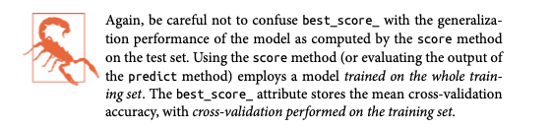

# Measuring Performance in Regression Models 

When the outcome is a number, the most common method for characteriz- ing a models predictive capabilities is to use the root mean squared error (RMSE). This metric is a function of the model residuals, which are the ob- served values minus the model predictions. 

- The mean squared error (MSE) is calculated by squaring the residuals and summing them. 
- The RMSE is then calculated by taking the square root of the MSE so that it is in the same units as the original data. 

The value is usually interpreted as either how far (on average) the residuals are from zero or as the average distance between the observed values and the model predictions. 

Another common metric is the coefficient of determination, commonly written as R2. This value can be interpreted as the proportion of the in- formation in the data that is explained by the model. Thus, an R2 value of 0.75 implies that the model can explain three-quarters of the variation in the outcome. While this is an easily interpretable statistic, the practitioner must re- member that R2 is a measure of correlation, not accuracy. 

Practically speaking, this dependence on the outcome variance can also have a drastic effect on how the model is viewed. For example, suppose we were building a model to predict the sale price of houses using predictors such as house characteristics (e.g., square footage, number of bedrooms, number of bathrooms), as well as lot size and location. If the range of the houses in the test set was large, say from $60K to $2M, the variance of the sale price would also be very large. One might view a model with a 90 % R2 positively, but the RMSE may be in the tens of thousands of dollars—poor predictive accuracy for anyone selling a moderately priced property. 

Here, the focus is on the ranking ability of the model rather than its predictive accuracy. In this situation, determining the rank correlation be- tween the observed and predicted values might be a more appropriate metric. The rank correlation takes the ranks of the observed outcome values (as op- posed to their actual numbers) and evaluates how close these are to ranks of the model predictions. To calculate this value, the ranks of the observed and predicted outcomes are obtained and the correlation coefficient between these ranks is calculated. This metric is commonly known as Spearman’s rank correlation. 

# Measuring Performance in Classification Models

Evaluating a classifier is often significantly trickier than evaluating a regressor.

Accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others). 

# Keep the End Goal in Mind 

When selecting a metric, you should always have the end goal of the machine learning application in mind. In practice, we are usually interested not just in making accurate predictions, but in using these predictions as part of a larger decision- making process. 

Before picking a machine learning metric, you should think about the high-level goal of the application, often called the business metric. The consequences of choosing a particular algorithm for a machine learning application are called the business impact. 

Maybe the high-level goal is avoiding traffic accidents, or decreasing the number of hospital admissions. It could also be getting more users for your website, or having users spend more money in your shop. When choosing a model or adjusting parameters, you should pick the model or parameter values that have the most positive influence on the business metric. Often this is hard, as assessing the business impact of a particular model might require putting it in production in a real-life system. 

In the early stages of development, and for adjusting parameters, it is often infeasible to put models into production just for testing purposes, because of the high business or personal risks that can be involved. Imagine evaluating the pedestrian avoidance capabilities of a self-driving car by just letting it drive around, without verifying it first; if your model is bad, pedestrians will be in trouble! Therefore we often need to find some surrogate evaluation procedure, using an evaluation metric that is easier to compute.

# Metrics for Binary Classification 

Binary classification is arguably the most common and conceptually simple application of machine learning in practice. However, there are still a number of caveats in evaluating even this simple task. Before we dive into alternative metrics, let’s have a look at the ways in which measuring accuracy might be misleading. 

Remember that for binary classification, we often speak of a positive class and a negative class, with the understanding that the positive class is the one we are looking for. 

# Kinds of errors 

Often, accuracy is not a good measure of predictive performance, as the number of mistakes we make does not contain all the information we are interested in. Imagine an application to screen for the early detection of cancer using an automated test. If the test is negative, the patient will be assumed healthy, while if the test is positive, the patient will undergo additional screening. Here, we would call a positive test (an indication of cancer) the positive class, and a negative test the negative class. 

We can’t assume that our model will always work perfectly, and it will make mistakes. For any application, we need to ask ourselves what the consequences of these mistakes might be in the real world. 

- An incorrect positive prediction is called a false positive. 
- An incorrect negative prediction is called a false negative. 

In a cancer diagnosis example, it is clear that we want to avoid false negatives as much as possible, while false positives can be viewed as more of a minor nuisance.

# Imbalanced datasets 

Types of errors play an important role when one of two classes is much more frequent than the other one. This is very common in practice.

Datasets in which one class is much more frequent than the other are often called imbalanced datasets, or datasets with imbalanced classes. In reality, imbalanced data is the norm, and it is rare that the events of interest have equal or even similar frequency in the data. 

Now let’s say you build a classifier that is 99% accurate on the click prediction task. What does that tell you? 99% accuracy sounds impressive, but this doesn’t take the class imbalance into account. You can achieve 99% accuracy without building a machine learning model, by always predicting “no click.” On the other hand, even with imbalanced data, a 99% accurate model could in fact be quite good. However, accuracy doesn’t allow us to distinguish the constant “no click” model from a poten‐ tially good model. 

The problem here is that accuracy is an inadequate measure for quantifying predictive performance in this imbal‐ anced setting. For the rest of this chapter, we will explore alternative metrics that provide better guidance in selecting models. 

# Confusion matrices 

One of the most comprehensive ways to represent the result of evaluating binary classification is using confusion matrices. 

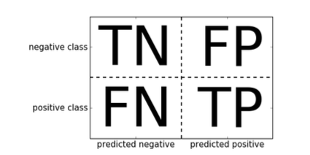

Entries on the main diagonal of the confusion matrix correspond to correct classifications, while other entries tell us how many samples of one class got mistakenly classified as another class. 

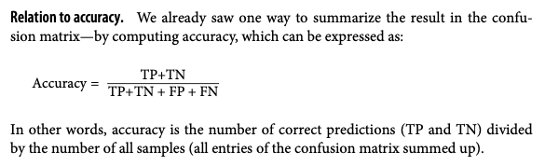

# Precision

There are several other ways to summarize the confusion matrix, with the most common ones being precision and recall. Precision measures how many of the samples predicted as positive are actually positive:

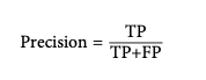

Precision is used as a performance metric when the goal is to limit the number of false positives. 

As an example, imagine a model for predicting whether a new drug will be effective in treating a disease in clinical trials. Clinical trials are notoriously expensive, and a pharmaceutical company will only want to run an experiment if it is very sure that the drug will actually work. 

Therefore, it is important that the model does not produce many false positives in other words, that it has a high precision. Precision is also known as positive predictive value (PPV). 

# Recall
Recall measures how many of the positive samples are captured by the positive predictions:

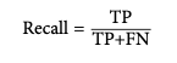

Recall is used as performance metric when we need to identify all positive samples; that is, when it is important to avoid false negatives. The cancer diagnosis example from earlier in this chapter is a good example for this: it is important to find all peo‐ ple that are sick, possibly including healthy patients in the prediction. Other names for recall are sensitivity, hit rate, or true positive rate (TPR). 

There is a trade-off between optimizing recall and optimizing precision. You can trivially obtain a perfect recall if you predict all samples to belong to the positive class— there will be no false negatives, and no true negatives either. However, predicting all samples as positive will result in many false positives, and therefore the precision will be very low. On the other hand, if you find a model that predicts only the single data point it is most sure about as positive and the rest as negative, then precision will be perfect (assuming this data point is in fact positive), but recall will be very bad. 

# F-score 

So, while precision and recall are very important measures, looking at only one of them will not provide you with the full picture. One way to summarize them is the f-score or f-measure, which is with the harmonic mean of precision and recall.

This particular variant is also known as the f1-score. As it takes precision and recall into account, it can be a better measure than accuracy on imbalanced binary classifi‐ cation datasets. 

However, the f-score seems to capture our intuition of what makes a good model much better than accuracy did. A disadvantage of the f-score, however, is that it is harder to interpret and explain than accuracy. 

If we want a more comprehensive summary of precision, recall, and f1-score, we can use the classification_report convenience function to compute all three at once, and print them in a nice format.

# Precision-recall curves

When developing a new model, it is not entirely clear what the operating point will be. For this reason, and to understand a modeling problem better, it is instructive to look at all possible thresholds, or all possible trade-offs of precision and recalls at once. This is possible using a tool called the precision-recall curve.

The closer a curve stays to the upper-right corner, the better the classifier. A point at the upper right means high precision and high recall for the same threshold. 
The more the model keeps recall high as precision goes up, the better. 

For automatic model comparison, we might want to summarize the information contained in the curve, without limiting ourselves to a particular thresh‐ old or operating point. One particular way to summarize the precision-recall curve is by computing the integral or area under the curve of the precision-recall curve, also known as the average precision.

# Receiver operating characteristics (ROC) 

There is another tool that is commonly used to analyze the behavior of classifiers at different thresholds: the receiver operating characteristics curve, or ROC curve for short. Similar to the precision-recall curve, the ROC curve considers all possible thresholds for a given classifier, but instead of reporting precision and recall, it shows the false positive rate (FPR) against the true positive rate (TPR). Recall that the true positive rate is simply another name for recall, while the false positive rate is the fraction of false positives out of all negative samples.

For the ROC curve, the ideal curve is close to the top left: you want a classifier that produces a high recall while keeping a low false positive rate.

# Metrics for Multiclass Classification 

Now that we have discussed evaluation of binary classification tasks in depth, let’s move on to metrics to evaluate multiclass classification. 

Basically, all metrics for multiclass classification are derived from binary classification metrics, but averaged over all classes. Accuracy for multiclass classification is again defined as the fraction of correctly classified examples. And again, when classes are imbalanced, accuracy is not a great evaluation measure. Imagine a three-class classification problem with 85% of points belonging to class A, 10% belonging to class B, and 5% belonging to class C. What does being 85% accurate mean on this dataset? In general, multiclass classification results are harder to understand than binary classification results. 

Apart from accuracy, common tools are the confusion matrix and the classification report we saw in the binary case in the previous section. 

The most commonly used metric for imbalanced datasets in the multiclass setting is the multiclass version of the f-score. The idea behind the multiclass f-score is to compute one binary f-score per class, with that class being the positive class and the other classes making up the negative classes. Then, these per-class f-scores are averaged using one of the following strategies: 

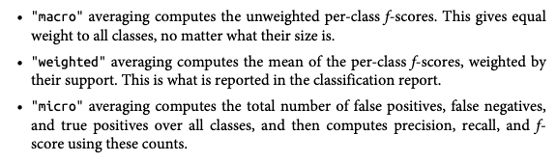

If you care about each sample equally much, it is recommended to use the "micro" average f1-score; if you care about each class equally much, it is recommended to use the "macro" average f1-score.

# --------------------------------------------------------------------------------

# --------------------------------------------------------------------------------

# Linear Models 
Linear models are a class of models that are widely used in practice and have been studied extensively in the last few decades, with roots going back over a hundred years. Linear models make a prediction using a linear function of the input features, which we will explain shortly. 

# Linear models for regression 

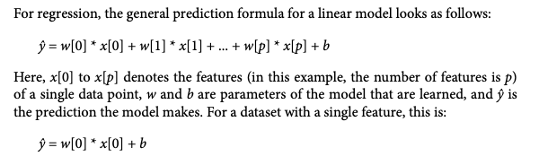

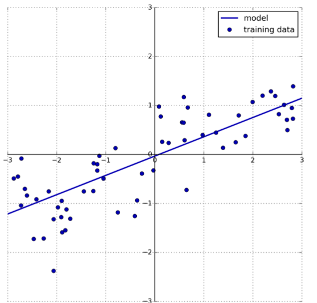

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyper‐ plane in higher dimensions (that is, when using more features). 
It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features. But looking at one-dimensional data gives a somewhat skewed perspective. 

For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function. 

There are many different linear models for regression. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled. We will now take a look at the most popular linear models for regression:

# Linear regression (aka ordinary least squares) 

Linear regression, or ordinary least squares (OLS), is the simplest and most classic lin‐ ear method for regression.

Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity. 

# Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. 

In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. 

Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regres‐ sion is known as L2 regularization.

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter.

The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.

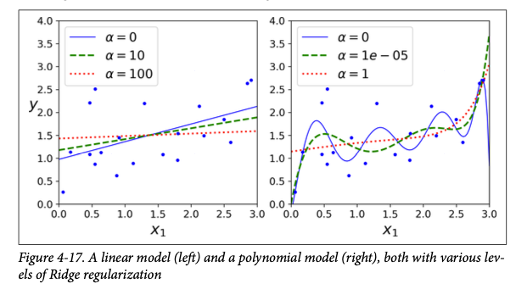

Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias. 

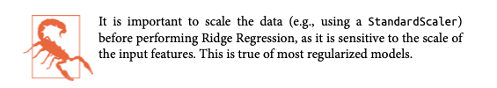

# Lasso regression

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. 

The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model. 

Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. When we do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run).

In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. 

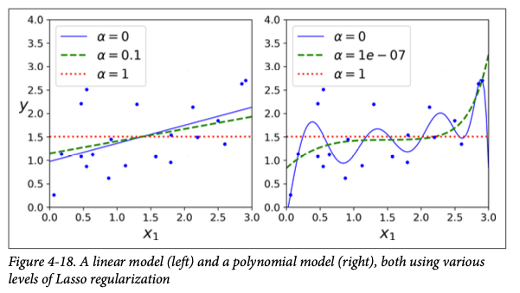

# Elastic Net 

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. which combines the penalties of Lasso and Ridge. 

In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization. 

The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

# Linear models for classification 

Linear models are also extensively used for classification. 

Let’s look at binary classification first. In this case, a prediction is made using the following formula:

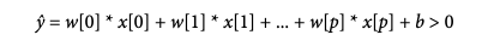

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. 

If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients (w) and the inter‐ cept (b). 

For linear models for regression, the output, ŷ, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane. 

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

Similarly to the case of regression, linear models for classification might seem very restrictive in low-dimensional spaces, only allowing for decision boundaries that are straight lines or planes. Again, in high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly important when considering more features.

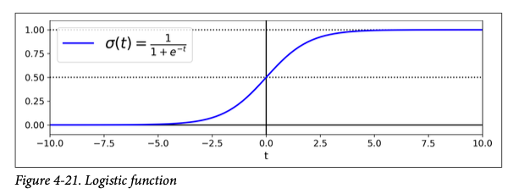

# Linear models for multiclass classification 

Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression, this is called Softmax Regression, or Multinomial Logistic Regression).

A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

# Softmax Regression 

The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput), so it should be used only with mutually exclusive classes, such as different types of plants. You cannot use it to recognize multiple people in one picture. 

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

Scikit- Learn’s LogisticRegression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). It also applies l2 regularization by default, which you can control using the hyperparameter C.

# Strengths, weaknesses, and parameters

The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. Large values for alpha or small values for C mean simple models. 

In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. 

The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are. 

Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thou‐ sands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge, which can be faster than the default on large datasets.

Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here. 

Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because it’s not feasible to train other models. 

However, in lower-dimensional spaces, other models might yield better generalization performance. 

# --------------------------------------------------------------------------------

# k-Nearest Neighbors 

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. 

To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors”.

# K-Nearest Neighbors for regression

The KNN approach simply predicts a new sample using the K-closest samples from the training set.

KNN cannot be cleanly summarized by a model. Instead, its construction is solely based on the individual samples from the training data. To predict a new sample for regression, KNN identifies that sample’s KNNs in the predictor space. 
The predicted response for the new sample is then the mean of the K neighbors’ responses. Other summary statistics, such as the median, can also be used in place of the mean to predict the new sample. 

The basic KNN method as described above depends on how the user defines distance between samples. Euclidean distance (i.e., the straight-line distance between two samples) is the most commonly used metric. Exist Manhattan distance too.

Because the KNN method fundamentally depends on distance between samples, the scale of the predictors can have a dramatic influence on the distances among samples. Data with predictors that are on vastly different scales will generate distances that are weighted towards predictors that have the largest scales. That is, predictors with the largest scales will contribute most to the distance between samples. To avoid this potential bias and to enable each predictor to contribute equally to the distance calculation, we recommend that all predictors be centered and scaled prior to performing K NN. 

Upon pre-processing the data and selecting the distance metric, the next step is to find the optimal number of neighbors. Like tuning parameters from other models, K can be determined by resampling. 
Small values of K usually over-fit and large values of K underfit the data. 

# K-Nearest Neighbors for classification

While many of the ideas from KNN for regression directly apply here, we will highlight the unique aspects of how this method applies to classification. 

The classification methods discussed thus far search for linear or nonlinear boundaries that optimally separate the data. These boundaries are then used to predict the classification of new samples. KNN takes a different approach by using a sample’s geographic neighborhood to predict the sample’s classification. 

Similar to the regression context, KNN for classification predicts a new sample using the K-closest samples from the training set. “Closeness” is determined by a distance metric, like Euclidean and Minkowski and choice of metric depends on predictor characteristics. 

For any distance metric, it is important to recall that the original measurement scales of the predictors affect the resulting distance calculations. This implies that if predictors are on widely different scales, the distance value between samples will be biased towards predictors with larger scales. To allow each predictor to contribute equally to the distance calculation, we recommend centering and scaling all predictors prior to performing KNN. 

As in the regression context, to determine the classification of a new sam- ple, the K-closest training set samples are determined via the distance metric. Class probability estimates for the new sample are calculated as the propor- tion of training set neighbors in each class. The new sample’s predicted class is the class with the highest probability estimate; if two or more classes are tied for the highest estimate, then the tie is broken at random or by looking ahead to the K + 1 closest neighbor. 

Any method with tuning parameters can be prone to over-fitting, and KNN is especially susceptible to this problem. Too few neighbors leads to highly localized fitting (i.e., over-fitting), while too many neighbors leads to boundaries that may not locate necessary separating structure in the data. Therefore, we must take the usual cross-validation or resampling approach for determining the optimal value of K. 

# Strengths, weaknesses, and parameters

In principle, there are two important parameters to the KNeighbors: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. 

Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. 

When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets). 

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features. 

# --------------------------------------------------------------------------------

*While there are support vector machines for classification and regression, we will restrict ourselves to the classification case. Similar concepts apply to support vector regression.

# Kernelized Support Vector Machines 

Kernelized support vector machines (often just referred to as SVMs) are an extension of linear SVM that allows for more complex models that are not defined simply by hyperplanes in the input space. 

Linear models can be quite limiting in low-dimensional spaces, as lines and hyperplanes have limited flexibility. One way to make a linear model more flexible is by adding more features—for example, by adding interactions or polynomials of the input features.

Adding nonlinear features to the representation of our data can make linear models much more powerful.
Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs).

However, often we don’t know which features to add, and adding many features (like all possible interactions in a 100- dimensional feature space) might make computation very expensive. Luckily, there is a clever mathematical trick that allows us to learn a classifier in a higher-dimensional space without actually computing the new, possibly very large representation.

This is known as the kernel trick, and it works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion. 

There are two ways to map your data into a higher-dimensional space that are commonly used with support vector machines: 
- The polynomial kernel, which computes all possible polynomials up to a certain degree of the original features (like feature1 ** 2 * feature2 ** 5).


- The radial basis function (RBF) kernel, also known as the Gaussian kernel. The Gaussian kernel is a bit harder to explain, as it corresponds to an infinite-dimensional feature space. One way to explain the Gaussian kernel is that it considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees.

they are very sensitive to the settings of the parameters and to the scaling of the data. In particular, they require all the features to vary on a similar scale.
One way to resolve this problem is by rescaling each feature so that they are all approximately on the same scale. A common rescaling method for kernel SVMs is to scale the data such that all features are between 0 and 1. MinMaxScaler

# Understanding SVMs 

During training, the SVM learns how important each of the training data points is to represent the decision boundary between the two classes. Typically only a subset of the training points matter for defining the decision boundary: the ones that lie on the border between the classes. These are called support vectors and give the support vector machine its name. 

To make a prediction for a new point, the distance to each of the support vectors is measured. A classification decision is made based on the distances to the support vec‐ tor, and the importance of the support vectors that was learned during training (stored in the dual_coef_ attribute of SVC).

# Tuning SVM parameters 

The gamma parameter controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together. 

The C parameter is a regularization parameter, similar to that used in the linear models. It limits the importance of each point (or more precisely, their dual_coef_).

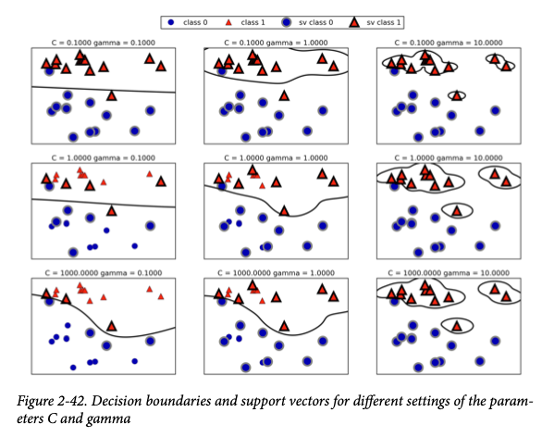

Going from left to right, we increase the value of the parameter gamma from 0.1 to 10. A small gamma means a large radius for the Gaussian kernel, which means that many points are considered close by. This is reflected in very smooth decision boundaries on the left, and boundaries that focus more on single points further to the right. A low value of gamma means that the decision boundary will vary slowly, which yields a model of low complexity, while a high value of gamma yields a more complex model. 

Going from top to bottom, we increase the C parameter from 0.1 to 1000. As with the linear models, a small C means a very restricted model, where each data point can only have very limited influence. You can see that at the top left the decision boundary looks nearly linear, with the misclassified points barely having any influence on the line. Increasing C, as shown on the bottom right, allows these points to have a stronger influence on the model and makes the decision boundary bend to correctly classify them. 

# Strengths, weaknesses, and parameters

Kernelized support vector machines are powerful models and perform well on a vari‐ ety of datasets. SVMs allow for complex decision boundaries, even if the data has only a few features. They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples. Run‐ ning an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage. 

Another downside of SVMs is that they require careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no pre‐ processing) in many applications. Furthermore, SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert. 
Still, it might be worth trying SVMs, particularly if all of your features represent measurements in similar units (e.g., all are pixel intensities) and they are on similar scales. 

The important parameters in kernel SVMs are the regularization parameter C, the choice of the kernel, and the kernel-specific parameters. Although we primarily focused on the RBF kernel, other choices are available in scikit-learn. The RBF kernel has only one parameter, gamma, which is the inverse of the width of the Gaus‐ sian kernel. gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together. 


# --------------------------------------------------------------------------------

# Naive Bayes Classifiers

Bayes’ Rule answers the question “based on the predictors that we have observed, what is the probability that the outcome is class Cl?”.

More mathematically, let Y be the class variable and X represent the collection of predictor variables. We are trying to estimate Pr[Y = Cl|X], which is “given X, what is the probability that the outcome is the lth class?” 

Bayes’ Rule provides the machinery to answer this:

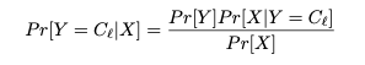

The naıve Bayes model simplifies the probabilities of the predictor values by assuming that all of the predictors are independent of the others. This is an extremely strong assumption. For most of the case it would be difficult to claim that this assumption is realistic. However, the assumption of independence yields a significant reduction in the complexity of the calculations.

Given such a severe and unrealistic assumption, why would one consider this model? First, the naıve Bayes model can be computed quickly, even for large training sets. For example, when the predictors are all categorical, simple lookup tables with the training set frequency distributions are all that are required. Secondly, despite such a strong assumption, the model performs efficient in many cases.

The reason that naive Bayes models are efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn: 

- GaussianNB (can be applied to any continuous data)
- BernoulliNB (assumes binary data)
- MultinomialNB (assumes count data)

# Strengths, weaknesses, and parameters 

MultinomialNB and BernoulliNB have a single parameter, alpha, which controls model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. This results in a “smoothing” of the statistics. A large alpha means more smoothing, resulting in less complex models. The algorithm’s performance is relatively robust to the setting of alpha, meaning that setting alpha is not critical for good performance. However, tuning it usually improves accuracy somewhat. 

GaussianNB is mostly used on very high-dimensional data, while the other two var‐ iants of naive Bayes are widely used for sparse count data such as text. MultinomialNB usually performs better than BinaryNB, particularly on datasets with a relatively large number of nonzero features (i.e., large documents). 

The naive Bayes models share many of the strengths and weaknesses of the linear models. They are very fast to train and to predict, and the training procedure is easy to understand. The models work very well with high-dimensional sparse data and are relatively robust to the parameters. Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long. 

# --------------------------------------------------------------------------------

# Decision Trees

Decision Trees are versatile Machine Learning algorithms that can per‐ form both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets.

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. 

Your goal is to get to the right answer by asking as few if/else questions as possible. 

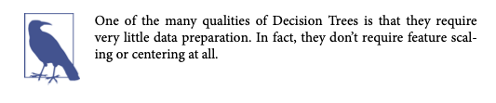

# Classifier trees
Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. 

Usually data does not come in the form of binary yes/no features as in the animal example, but is instead represented as continuous features, the tests that are used on continuous data are of the form “Is feature i larger than value a?”.

To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. 

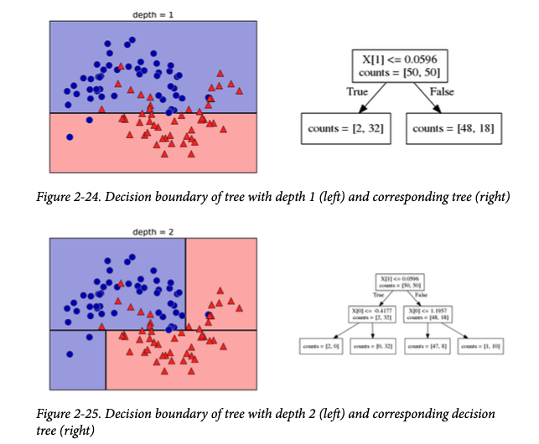

# The CART Training Algorithm 

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees). 

The algorithm works by first splitting the training set into two subsets using a single feature k and a threshold tk (e.g., “petal length ≤ 2.45 cm”). How does it choose k and tk? It searches for the pair (k, tk) that produces the purest subsets (weighted by their size). 

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity. 

A few other hyperparameters (described in a moment) control additional stopping conditions (min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes). 

# Controlling complexity of decision trees 

Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. 

There are two common strategies to prevent overfitting: 
- stopping the creation of the tree early (also called pre-pruning)
- building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning).

Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it. 

Decision trees in scikit-learn only implements pre-pruning, not post-pruning. 

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data.

# Regression trees

All that was said is similarly true for decision trees for regression, as implemented in Decision TreeRegressor. The usage and analysis of regression trees is very similar to that of classification trees. 

There is one particular property of using tree-based models for regression that we want to point out, though. The DecisionTreeRegressor (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data. 

The tree has no ability to generate “new” responses, outside of what was seen in the training data. This shortcoming applies to all models based on trees.

# Strengths, weaknesses, and parameters 

the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting.

Decision trees have two advantages over many of the algorithms we’ve discussed so far: the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and con‐ tinuous features. 

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in most applications, the ensemble methods we discuss next are usually used in place of a single decision tree. 

# --------------------------------------------------------------------------------

# Ensemble Learning 

Suppose you pose a complex question to thousands of random people, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert’s answer. This is called the wisdom of the crowd.

Similarly, if you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

As an example of an Ensemble method, you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predictions of all the individual trees, then predict the class that gets the most votes. Such an ensemble of Decision Trees is called a Random Forest, and despite its simplicity, this is one of the most powerful Machine Learning algorithms available today. 

# Voting Classifiers 

Suppose you have trained a few classifiers, each one achieving about 80% accuracy. You may have a Logistic Regression classifier, an SVM classifier, a Random Forest classifier, a K-Nearest Neighbors classifier, and perhaps a few more.

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier.

Somewhat surprisingly, this voting classifier often achieves a higher accuracy than the best classifier in the ensemble. In fact, even if each classifier is a weak learner (meaning it does only slightly better than random guessing), the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse. 

# Bagging and Pasting 

One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. Another approach is to use the same training algorithm for every predictor and train them on different random subsets of the training set. 

When sampling is performed with replacement, this method is called bagging1 (short for boot‐ strap aggregating2). 

When sampling is performed without replacement, it is called pasting

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor. 

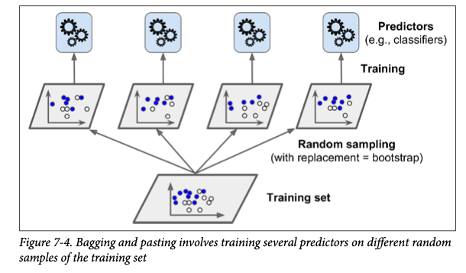

# Random Patches and Random Subspaces 

The BaggingClassifier class supports sampling the features as well. Sampling is controlled by two hyperparameters:
- max_features
- bootstrap_features.

They work the same way as max_samples and bootstrap, but for feature sampling instead of instance sampling. Thus, each predictor will be trained on a random subset of the input features. 

This technique is particularly useful when you are dealing with high-dimensional inputs (such as images). Sampling both training instances and features is called the Random Patches method.Keeping all training instances (by setting bootstrap=False and max_samples=1.0) but sampling features (by setting bootstrap_features to True and/or max_features to a value smaller than 1.0) is called the Random Subspaces method.

Sampling features results in even more predictor diversity, trading a bit more bias for a lower variance. 

# Random Forests 

Random Forest9 is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with max_samples set to the size of the training set. 

Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier class, which is more convenient and optimized for Decision Trees (similarly, there is a RandomForestRegressor class for regression tasks). 

With a few exceptions, a RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.

# Extra-Trees 

When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting (as discussed earlier). It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do).

# Boosting 

Boosting (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. 
The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

There are many boosting methods available, but by far the most popular are AdaBoost13 (short for Adaptive Boosting) 
and Gradient Boosting. 

# AdaBoost 

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. 

This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost. 

For example, when training an AdaBoost classifier, the algorithm first trains a base classifier (such as a Decision Tree) and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predic‐ tions on the training set, updates the instance weights, and so on.

# Gradient Boosting 

Another very popular boosting algorithm is Gradient Boosting. Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. 

However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor. 

# --------------------------------------------------------------------------------

# --------------------------------------------------------------------------------

# Clustering 

Clustering is the task of partitioning the dataset into groups, called clusters. The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. 

Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

# --------------------------------------------------------------------------------

# k-Means Clustering 

k-means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. 

The algorithm alternates between two steps: 
- assigning each data point to the closest cluster center.
- then setting each cluster center as the mean of the data points that are assigned to it.

The algorithm is finished when the assignment of instances to clusters no longer changes. 

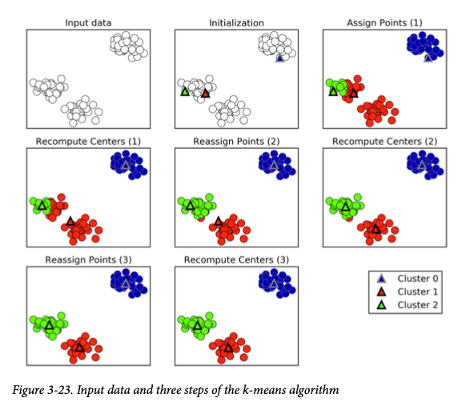

We specified that we are looking for three clusters, so the algorithm was initialized by declaring three data points randomly as cluster centers (see “Initialization”). Then the iterative algorithm starts. First, each data point is assigned to the cluster center it is closest to (see “Assign Points (1)”). Next, the cluster centers are updated to be the mean of the assigned points (see “Recompute Centers (1)”). Then the process is repeated two more times. After the third iteration, the assignment of points to cluster centers remained unchanged, so the algorithm stops.

# Failure cases of k-means 

Even if you know the “right” number of clusters for a given dataset, k-means might not always be able to recover them.
Each cluster is defined solely by its center, which means that each cluster is a convex shape. As a result of this, k-means can only capture relatively simple shapes. 

k-means also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. 

# --------------------------------------------------------------------------------

# Agglomerative Clustering 

Agglomerative clustering refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. 

The stopping criterion implemented in scikit-learn is the number of clusters, so similar clusters are merged until only the specified number of clusters are left. 

There are several linkage criteria that specify how exactly the “most similar cluster” is measured. This measure is always defined between two existing clusters. 

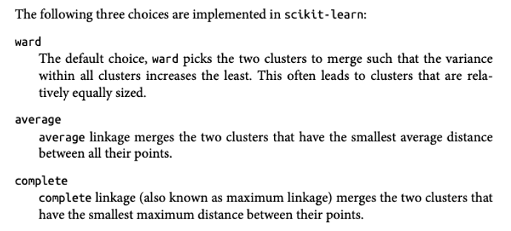

# Hierarchical clustering and dendrograms 

Agglomerative clustering produces what is known as a hierarchical clustering. 

The clustering proceeds iteratively, and every point makes a journey from being a single point cluster to belonging to some final cluster. 

Each intermediate step provides a clustering of the data (with a different number of clusters). It is sometimes helpful to look at all possible clusterings jointly. 

There is a tool to visualize hierarchical clustering, called a dendrogram, that can handle multidimensional datasets.

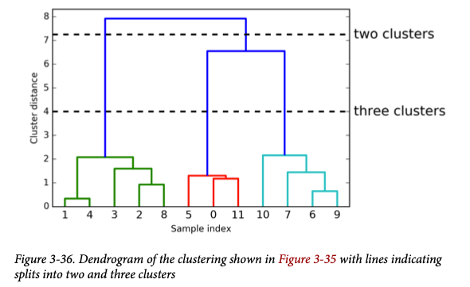

# --------------------------------------------------------------------------------

# DBSCAN 

Another very useful clustering algorithm is DBSCAN (which stands for “density- based spatial clustering of applications with noise”). The main benefits of DBSCAN are that it does not require the user to set the number of clusters a priori, it can capture clusters of complex shapes, and it can identify points that are not part of any cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets. 

DBSCAN works by identifying points that are in “crowded” regions of the feature space, where many data points are close together. These regions are referred to as dense regions in feature space. The idea behind DBSCAN is that clusters form dense regions of data, separated by regions that are relatively empty. 

Points that are within a dense region are called core samples (or core points), and they are defined as follows. There are two parameters in DBSCAN: 
- min_samples
- eps

If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample. Core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN. 

The algorithm works by picking an arbitrary point to start with. It then finds all points with distance eps or less from that point. If there are less than min_samples points within distance eps of the starting point, this point is labeled as noise, meaning that it doesn’t belong to any cluster. If there are more than min_samples points within a distance of eps, the point is labeled a core sample and assigned a new cluster label. Then, all neighbors (within eps) of the point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. If they are core samples, their neighbors are visited in turn, and so on. The cluster grows until there are no more core samples within distance eps of the cluster. Then another point that hasn’t yet been visited is picked, and the same procedure is repeated. 

In the end, there are three kinds of points: core points, points that are within distance eps of core points (called boundary points), and noise. When the DBSCAN algorithm is run on a particular dataset multiple times, the clustering of the core points is always the same, and the same points will always be labeled as noise. However, a boundary point might be neighbor to core samples of more than one cluster. Therefore, the cluster membership of boundary points depends on the order in which points are vis‐ ited. Usually there are only few boundary points, and this slight dependence on the order of points is not important. 

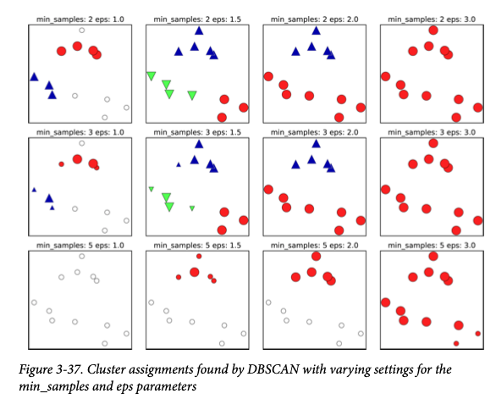

While DBSCAN doesn’t require setting the number of clusters explicitly, setting eps implicitly controls how many clusters will be found. Finding a good setting for eps is sometimes easier after scaling the data using StandardScaler or MinMaxScaler, as using these scaling techniques will ensure that all features have similar ranges.

# --------------------------------------------------------------------------------

# Gaussian Mixtures 

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. 

Each cluster can have a different ellipsoidal shape, size, density, and orientation. When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of these distributions are. 

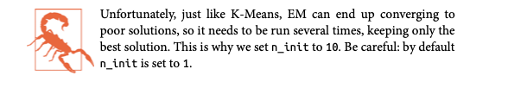

# Selecting the Number of Clusters 
With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. 

Instead, you can try to find the model that minimizes a theoretical information criterion, such as 
- Bayesian information criterion (BIC)
- Akaike information criterion (AIC) 

# --------------------------------------------------------------------------------

# Comparing and Evaluating Clustering Algorithms 

One of the challenges in applying clustering algorithms is that it is very hard to assess how well an algorithm worked, and to compare outcomes between different algorithms. 

A common mistake when evaluating clustering in this way is to use accuracy_score instead of adjusted_rand_score, normalized_mutual_info_score, or some other clustering metric. The problem in using accuracy is that it requires the assigned cluster labels to exactly match the ground truth.

# --------------------------------------------------------------------------------

# Summary of Clustering Methods 

This section has shown that applying and evaluating clustering is a highly qualitative procedure, and often most helpful in the exploratory phase of data analysis. 

k-means and agglomerative clustering allow you to specify the number of desired clusters, while DBSCAN lets you define proximity using the eps parameter, which indirectly influences cluster size. 

All the methods can be used on large, real-world datasets, are relatively easy to understand, and allow for clustering into many clusters. 

Each of the algorithms has somewhat different strengths. k-means allows for a characterization of the clusters using the cluster means. It can also be viewed as a decomposition method, where each data point is represented by its cluster center. 

DBSCAN allows for the detection of “noise points” that are not assigned any cluster, and it can help automatically determine the number of clusters. In contrast to the other two methods, it allow for complex cluster shapes, as we saw in the two_moons example. DBSCAN sometimes produces clusters of very differing size, which can be a strength or a weakness. 

Agglomerative clustering can provide a whole hierarchy of possible partitions of the data, which can be easily inspected via dendrograms. 

# --------------------------------------------------------------------------------

# --------------------------------------------------------------------------------

# Dimensionality Reduction 

Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only do all these features make training extremely slow, but they can also make it much harder to find a good solution, as we will see. 

This problem is often referred to as the curse of dimensionality. 

The more dimensions the training set has, the greater the risk of overfitting it. 

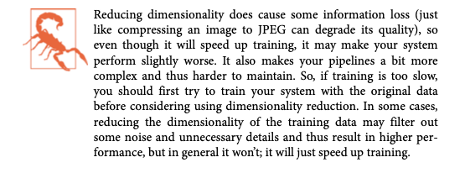

Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization. Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such as clusters.

# --------------------------------------------------------------------------------

Main Approaches for Dimensionality Reduction:

# Matrix Factorization 

Techniques from linear algebra can be used for dimensionality reduction. Specifically, matrix factorization methods can be used to reduce a dataset matrix into its constituent parts. 

The most common method for ranking the components is principal components analysis, or PCA for short. 

# Principal Component Analysis (PCA) 

Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. 

This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. 

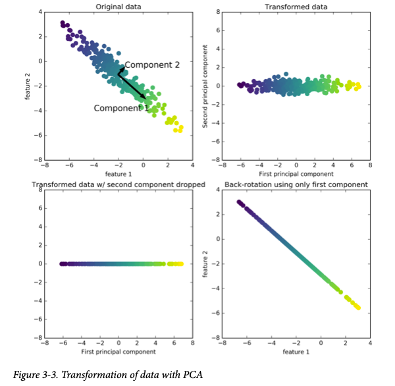

The first plot (top left) shows the original data points, colored to distinguish among them. The algorithm proceeds by first finding the direction of maximum variance, labeled “Component 1”. This is the direction (or vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other. Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle) to the first direction. 

In two dimensions, there is only one possible orientation that is at a right angle, but in higher-dimensional spaces there would be (infinitely) many orthogonal directions. Although the two components are drawn as arrows, it doesn’t really matter where the head and the tail are; we could have drawn the first component from the center up to the top left instead of down to the bottom right. 

The directions found using this process are called principal components, as they are the main directions of variance in the data. In general, there are as many principal components as original features. 

The second plot (top right) shows the same data, but now rotated so that the first principal component aligns with the x-axis and the second principal component aligns with the y-axis. Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero. In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal. 

We can use PCA for dimensionality reduction by retaining only some of the principal components. In this example, we might keep only the first principal component, as 
shown in the third panel in Figure 3-3 (bottom left). This reduces the data from a two-dimensional dataset to a one-dimensional dataset. Note, however, that instead of keeping only one of the original features, we found the most interesting direction (top left to bottom right in the first panel) and kept this direction, the first principal component. 

Finally, we can undo the rotation and add the mean back to the data. This will result in the data shown in the last panel in Figure 3-3. These points are in the original fea‐ ture space, but we kept only the information contained in the first principal compo‐ nent. This transformation is sometimes used to remove noise effects from the data or visualize what part of the information is retained using the principal components. 

# Kernel PCA 

We have discussed the kernel trick, a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression with Support Vector Machines. Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space. 

It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. 

This is called KernelPCA (kPCA). It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold. 

# Non-Negative Matrix Factorization (NMF) 

Non-negative matrix factorization is another unsupervised learning algorithm that aims to extract useful features. It works similarly to PCA and can also be used for dimensionality reduction. 

As in PCA, we are trying to write each data point as a weighted sum of some components, in NMF we want the components and the coefficients to be non- negative; that is, we want both the components and the coefficients to be greater than or equal to zero. Consequently, this method can only be applied to data where each feature is non-negative, as a non-negative sum of non-negative components cannot become negative. 

The process of decomposing data into a non-negative weighted sum is particularly helpful for data that is created as the addition (or overlay) of several independent sources, such as an audio track of multiple people speaking, or music with many instruments. In these situations, NMF can identify the original components that make up the combined data. 

Overall, NMF leads to more interpretable components than PCA, as negative components and coefficients can lead to hard-to-interpret cancellation effects.

# SVD 

Singular Value Decomposition, or SVD, might be the most popular technique for dimensionality reduction when data is sparse. 

Sparse data refers to rows of data where many of the values are zero. This is often the case in some problem domains like recommender systems where a user has a rating for very few movies or songs in the database and zero ratings for all other cases. Another common example is a bag-of-words model of a text document, where the document has a count or frequency for some words and most words have a 0 value. Examples of sparse data appropriate for applying SVD for dimensionality reduction: 

- Recommender Systems
- Customer-Product purchases 􏰀 User-Song Listen Counts
- User-Movie Ratings
- Text Classification
- One Hot Encoding
- Bag-of-Words Counts
- TF/IDF 

# --------------------------------------------------------------------------------

# Manifold Learning

The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space. More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension. 

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed. 

The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold. 

For example, in the top row of Figure 8-6 the Swiss roll is split into two classes: in the 3D space (on the left), the decision boundary would be fairly complex, but in the 2D unrolled manifold space (on the right), the decision boundary is a straight line. 

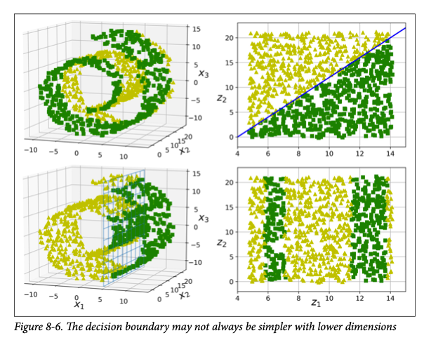

# Manifold Learning with t-SNE 

While PCA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot, the nature of the method (applying a rotation and then dropping directions) limits its usefulness.

There is a class of algorithms for visualization called manifold learning algorithms that allow for much more complex mappings, and often provide better visualizations. A particularly useful one is the t-SNE algorithm.

Manifold learning algorithms are mainly aimed at visualization, and so are rarely used to generate more than two new features. Some of them, including t-SNE, compute a new representation of the training data, but don’t allow transformations of new data. This means these algorithms cannot be applied to a test set, they can only transform the data they were trained for. Manifold learning can be useful for exploratory data analysis, but is rarely used if the final goal is supervised learning 

The idea behind t-SNE is to find a two-dimensional representation of the data that preserves the distances between points as best as possible. t-SNE starts with a random two- dimensional representation for each data point, and then tries to make points that are close in the original feature space closer, and points that are far apart in the original feature space farther apart. 

t-SNE puts more emphasis on points that are close by, rather than preserving distances between farapart points. In other words, it tries to preserve the information indicating which points are neighbors to each other. 

# LLE 

Locally Linear Embedding (LLE) is another powerful nonlinear dimensionality reduction (NLDR) technique. It is a Manifold Learning technique that does not rely on projections, like the previous algorithms do. 

In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved (more details shortly). This approach makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise. 